## Reading Tabular Data and CSV data

In [86]:
import pandas as pd

url = "http://bit.ly/chiporders"

orders = pd.read_table(url, index_col=0)
orders.head()

,quantity,item_name,choice_description,item_price
order_id,,,,
1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,Izze,[Clementine],$3.39
1,1,Nantucket Nectar,[Apple],$3.39
1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [97]:
url = "http://bit.ly/uforeports"  #This file is in csv fotmat so we can use pd.read_csv
data = pd.read_csv(url)
data.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [65]:
data.City

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
5                 Valley City
6                 Crater Lake
7                        Alma
8                     Eklutna
9                     Hubbard
10                    Fontana
11                   Waterloo
12                     Belton
13                     Keokuk
14                  Ludington
15                Forest Home
16                Los Angeles
17                  Hapeville
18                     Oneida
19                 Bering Sea
20                   Nebraska
21                        NaN
22                        NaN
23                  Owensboro
24                 Wilderness
25                  San Diego
26                 Wilderness
27                     Clovis
28                 Los Alamos
29               Ft. Duschene
                 ...         
18211                 Holyoke
18212                  Carson
18213     

In [66]:
data = pd.read_csv(url, index_col=0) #With index_column=0 
data.head()

,Colors Reported,Shape Reported,State,Time
City,,,,
Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
Holyoke,NaN,OVAL,CO,2/15/1931 14:00
Abilene,NaN,DISK,KS,6/1/1931 13:00
New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [67]:
data.City

AttributeError: 'DataFrame' object has no attribute 'City'

## Adding new column

In [88]:
data['Location'] = data.City + ',' + data.State
data.head()

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca,NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro,NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke,CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene,KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair,NY"


## Renaming Column

### Renaming multiple Columns:

In [98]:
data.rename(columns = {'City' : 'city', 'Colors Reported' :'colours_reported'}, inplace=True)
data.head()

,city,colours_reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


### Renaming all columns:

In [103]:
new_col=['city','colours_reported','shape_reported','state','time','location']
data.columns = new_col
data.head()

,city,colours_reported,shape_reported,state,time,location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


## Removing columns

In [104]:
data.drop('time', axis=1, inplace=True)
data.head()

,city,colours_reported,shape_reported,state,location
0,Ithaca,NaN,TRIANGLE,NY,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,"New York Worlds Fair, NY"


In [105]:
drop_list = ['city','state']
data.drop(drop_list,axis=1,inplace=True)
data.head()

,colours_reported,shape_reported,location
0,NaN,TRIANGLE,"Ithaca, NY"
1,NaN,OTHER,"Willingboro, NJ"
2,NaN,OVAL,"Holyoke, CO"
3,NaN,DISK,"Abilene, KS"
4,NaN,LIGHT,"New York Worlds Fair, NY"


In [107]:
rows = [0,1]
data.drop(rows, axis=0, inplace=True)
data.head()

,colours_reported,shape_reported,location
2,NaN,OVAL,"Holyoke, CO"
3,NaN,DISK,"Abilene, KS"
4,NaN,LIGHT,"New York Worlds Fair, NY"
5,NaN,DISK,"Valley City, ND"
6,NaN,CIRCLE,"Crater Lake, CA"


## Sorting

In [109]:
url = "http://bit.ly/imdbratings"
movies = pd.read_csv(url)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [110]:
movies['title'].sort_values()

542                   (500) Days of Summer
5                             12 Angry Men
201                       12 Years a Slave
698                              127 Hours
110                  2001: A Space Odyssey
910                                   2046
596                               21 Grams
624                              25th Hour
708                       28 Days Later...
60                                3 Idiots
225                                 3-Iron
570                                    300
555                           3:10 to Yuma
427           4 Months, 3 Weeks and 2 Days
824                                     42
597                                  50/50
203                                  8 1/2
170                       A Beautiful Mind
941                       A Bridge Too Far
571                           A Bronx Tale
266                      A Christmas Story
86                      A Clockwork Orange
716                         A Few Good Men
750        

In [114]:
movies['star_rating'].sort_values(ascending=False)

0      9.3
1      9.2
2      9.1
3      9.0
6      8.9
8      8.9
7      8.9
9      8.9
5      8.9
4      8.9
10     8.8
11     8.8
12     8.8
13     8.8
14     8.8
19     8.7
23     8.7
22     8.7
21     8.7
20     8.7
24     8.7
18     8.7
16     8.7
15     8.7
17     8.7
32     8.6
39     8.6
38     8.6
37     8.6
36     8.6
      ... 
974    7.4
975    7.4
976    7.4
953    7.4
954    7.4
977    7.4
952    7.4
951    7.4
930    7.4
931    7.4
932    7.4
933    7.4
934    7.4
935    7.4
936    7.4
937    7.4
938    7.4
939    7.4
940    7.4
941    7.4
942    7.4
943    7.4
944    7.4
945    7.4
946    7.4
947    7.4
948    7.4
949    7.4
950    7.4
978    7.4
Name: star_rating, Length: 979, dtype: float64

In [117]:
movies.sort_values('star_rating', ascending=False)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


In [119]:
movies.sort_values('duration', ascending=False)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
767,7.6,"It's a Mad, Mad, Mad, Mad World",APPROVED,Action,205,"[u'Spencer Tracy', u'Milton Berle', u'Ethel Me..."
630,7.7,Malcolm X,PG-13,Biography,202,"[u'Denzel Washington', u'Angela Bassett', u'De..."


### Sorting a DataFrame using multiple columns

In [121]:
col = ['star_rating','duration']
movies.sort_values(col, ascending=False)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."


## Filtering

In [122]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [127]:
movies[movies.duration >= 120].sort_values(col, ascending=False)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
14,8.8,The Lord of the Rings: The Two Towers,PG-13,Adventure,179,"[u'Elijah Wood', u'Ian McKellen', u'Viggo Mort..."


In [130]:
movies[(movies.star_rating>=8) & (movies.genre=='Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"
16,8.7,One Flew Over the Cuckoo's Nest,R,Drama,133,"[u'Jack Nicholson', u'Louise Fletcher', u'Mich..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
22,8.7,It's a Wonderful Life,APPROVED,Drama,130,"[u'James Stewart', u'Donna Reed', u'Lionel Bar..."
24,8.7,Se7en,R,Drama,127,"[u'Morgan Freeman', u'Brad Pitt', u'Kevin Spac..."
27,8.6,The Silence of the Lambs,R,Drama,118,"[u'Jodie Foster', u'Anthony Hopkins', u'Lawren..."
32,8.6,Casablanca,PG,Drama,102,"[u'Humphrey Bogart', u'Ingrid Bergman', u'Paul..."
33,8.6,Whiplash,R,Drama,107,"[u'Miles Teller', u'J.K. Simmons', u'Melissa B..."


In [140]:
movies[(movies.star_rating>=8) & ((movies.genre=='Drama') | (movies.genre=='Crime'))]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"
16,8.7,One Flew Over the Cuckoo's Nest,R,Drama,133,"[u'Jack Nicholson', u'Louise Fletcher', u'Mich..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
21,8.7,City of God,R,Crime,130,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."


In [145]:
watch_list = ['Drama','Crime','Comedy']
movies[(movies.genre.isin(watch_list)) & (movies.star_rating>=9)]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


## Drop

In [147]:
url = "http://bit.ly/drinksbycountry"
drinks = pd.read_csv(url)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [152]:
a = drinks.drop('continent', axis=1)
#drinks.head()
a

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [153]:
drinks.drop(3, axis=0).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America


In [154]:
rows = [2,5,8]
drinks.drop(rows, axis=0).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
6,Argentina,193,25,221,8.3,South America


## Strings Methods

In [156]:
url = "http://bit.ly/chiporders"
orders = pd.read_table(url)
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [162]:
orders.item_name.str.upper()

0                CHIPS AND FRESH TOMATO SALSA
1                                        IZZE
2                            NANTUCKET NECTAR
3       CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                                CHICKEN BOWL
5                                CHICKEN BOWL
6                               SIDE OF CHIPS
7                               STEAK BURRITO
8                            STEAK SOFT TACOS
9                               STEAK BURRITO
10                        CHIPS AND GUACAMOLE
11                       CHICKEN CRISPY TACOS
12                         CHICKEN SOFT TACOS
13                               CHICKEN BOWL
14                        CHIPS AND GUACAMOLE
15      CHIPS AND TOMATILLO-GREEN CHILI SALSA
16                            CHICKEN BURRITO
17                            CHICKEN BURRITO
18                                CANNED SODA
19                               CHICKEN BOWL
20                        CHIPS AND GUACAMOLE
21                           BARBA

In [167]:
orders.item_name.str.contains('Chicken')

0       False
1       False
2       False
3       False
4        True
5        True
6       False
7       False
8       False
9       False
10      False
11       True
12       True
13       True
14      False
15      False
16       True
17       True
18      False
19       True
20      False
21      False
22      False
23       True
24      False
25      False
26       True
27      False
28      False
29       True
        ...  
4592    False
4593    False
4594    False
4595     True
4596    False
4597    False
4598    False
4599     True
4600    False
4601    False
4602    False
4603    False
4604     True
4605    False
4606    False
4607    False
4608    False
4609    False
4610    False
4611    False
4612    False
4613    False
4614    False
4615     True
4616    False
4617    False
4618    False
4619     True
4620     True
4621     True
Name: item_name, Length: 4622, dtype: bool

In [169]:
orders.choice_description.str.replace('[','"').str.replace(']','"').head()

0                                                  NaN
1                                         "Clementine"
2                                              "Apple"
3                                                  NaN
4    "Tomatillo-Red Chili Salsa (Hot), "Black Beans...
Name: choice_description, dtype: object

## Changing data type

In [170]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [173]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [175]:
drinks['beer_servings'] = drinks.beer_servings.astype(float)
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [176]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0,0,0.0,Asia
1,Albania,89.0,132,54,4.9,Europe
2,Algeria,25.0,0,14,0.7,Africa
3,Andorra,245.0,138,312,12.4,Europe
4,Angola,217.0,57,45,5.9,Africa


In [177]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [179]:
orders.item_price.mean()

TypeError: Could not convert $2.39 $3.39 $3.39 $2.39 $16.98 $10.98 $1.69 $11.75 $9.25 $9.25 $4.45 $8.75 $8.75 $11.25 $4.45 $2.39 $8.49 $8.49 $2.18 $8.75 $4.45 $8.99 $3.39 $10.98 $3.39 $2.39 $8.49 $8.99 $1.09 $8.49 $2.39 $8.99 $1.69 $8.99 $1.09 $8.75 $8.75 $4.45 $2.95 $11.75 $2.15 $4.45 $11.25 $11.75 $8.75 $10.98 $8.99 $3.39 $8.99 $3.99 $8.99 $2.18 $10.98 $1.09 $8.99 $2.39 $9.25 $11.25 $11.75 $2.15 $4.45 $9.25 $11.25 $8.75 $8.99 $8.99 $3.39 $8.99 $10.98 $8.99 $1.69 $8.99 $3.99 $8.75 $4.45 $8.75 $8.75 $2.15 $8.75 $11.25 $2.15 $9.25 $8.75 $8.75 $9.25 $8.49 $8.99 $1.09 $9.25 $2.95 $11.75 $11.75 $9.25 $11.75 $4.45 $9.25 $4.45 $11.75 $8.75 $8.75 $4.45 $8.99 $8.99 $3.99 $8.49 $3.39 $8.99 $1.09 $9.25 $4.45 $8.75 $2.95 $4.45 $2.39 $8.49 $8.99 $8.49 $1.09 $8.99 $3.99 $8.75 $9.25 $4.45 $11.25 $4.45 $8.99 $1.09 $9.25 $2.95 $4.45 $11.75 $4.45 $8.49 $2.39 $10.98 $22.50 $11.75 $4.45 $11.25 $4.45 $11.25 $4.45 $11.25 $11.25 $11.75 $9.25 $4.45 $11.48 $17.98 $1.69 $17.50 $4.45 $8.49 $2.39 $17.50 $4.45 $4.45 $11.25 $11.75 $10.98 $8.49 $10.98 $2.18 $11.48 $8.49 $2.39 $4.45 $11.25 $11.75 $8.75 $8.49 $2.18 $8.49 $3.39 $8.49 $8.99 $10.98 $11.48 $8.49 $1.09 $1.09 $9.25 $8.75 $2.95 $9.25 $4.45 $11.25 $11.48 $8.49 $8.49 $8.99 $2.39 $11.25 $8.75 $2.95 $1.09 $8.99 $8.49 $2.39 $10.98 $1.09 $3.99 $11.25 $8.75 $8.49 $3.39 $8.75 $9.25 $2.15 $11.25 $11.25 $11.25 $4.45 $22.50 $4.45 $11.75 $8.75 $17.50 $8.75 $9.25 $8.75 $2.15 $9.25 $4.30 $8.75 $11.25 $2.15 $8.99 $1.09 $8.99 $3.99 $8.75 $2.95 $2.95 $11.75 $5.90 $9.25 $9.25 $11.75 $9.25 $2.95 $17.50 $8.75 $9.25 $10.98 $8.99 $1.09 $1.09 $1.09 $8.99 $10.98 $1.09 $8.75 $8.75 $9.25 $9.25 $8.75 $8.75 $8.99 $8.99 $8.99 $1.09 $11.75 $1.25 $8.99 $2.39 $9.25 $2.95 $8.99 $3.99 $8.49 $2.39 $8.49 $8.49 $8.49 $1.69 $8.49 $3.99 $8.99 $1.69 $1.09 $23.78 $17.50 $2.15 $8.75 $9.25 $9.25 $8.75 $4.45 $8.75 $11.25 $11.25 $1.25 $9.25 $4.45 $11.25 $11.75 $11.75 $6.49 $8.99 $2.39 $8.49 $2.39 $11.25 $8.75 $2.15 $8.99 $1.69 $8.75 $11.25 $2.15 $4.45 $8.75 $8.49 $8.99 $17.50 $8.49 $1.09 $1.09 $8.75 $1.25 $2.15 $11.08 $8.49 $8.49 $8.99 $2.39 $8.75 $2.15 $1.50 $11.25 $2.15 $8.49 $8.49 $11.75 $9.25 $11.75 $1.25 $11.25 $8.75 $4.45 $6.49 $9.25 $2.95 $11.25 $4.45 $1.25 $1.25 $8.49 $2.39 $2.18 $8.49 $2.18 $22.16 $17.50 $8.75 $2.95 $6.49 $8.99 $3.39 $3.39 $8.99 $8.49 $11.25 $2.15 $11.25 $2.95 $11.25 $1.25 $8.99 $1.09 $8.75 $8.75 $9.25 $2.95 $11.75 $1.50 $8.99 $1.09 $11.25 $1.25 $1.25 $11.25 $11.75 $2.15 $8.99 $1.69 $11.75 $6.49 $8.75 $9.25 $11.25 $4.45 $1.25 $11.25 $4.45 $8.49 $8.99 $8.49 $8.99 $11.25 $1.25 $11.75 $1.25 $11.75 $9.25 $4.45 $11.25 $2.15 $32.94 $1.25 $11.25 $11.48 $1.69 $1.09 $17.50 $4.45 $6.49 $9.25 $8.75 $9.25 $9.25 $8.75 $8.75 $2.15 $2.95 $17.50 $10.98 $11.48 $11.48 $3.39 $8.99 $1.69 $8.99 $1.09 $10.98 $3.39 $8.99 $1.09 $9.25 $8.75 $11.25 $4.45 $2.95 $9.25 $22.20 $8.49 $8.99 $8.75 $8.75 $11.75 $8.75 $11.25 $9.25 $11.25 $11.25 $8.75 $11.25 $2.95 $1.25 $8.49 $1.69 $11.75 $11.25 $8.75 $8.75 $4.45 $8.49 $3.99 $8.49 $3.99 $11.48 $1.69 $1.09 $11.25 $1.50 $10.58 $1.69 $9.25 $11.25 $8.75 $9.25 $11.25 $11.25 $8.75 $11.75 $8.75 $8.75 $8.75 $2.15 $11.25 $11.75 $2.50 $4.45 $9.25 $4.45 $11.25 $8.49 $3.99 $9.25 $9.25 $11.25 $9.25 $11.75 $11.25 $1.25 $23.50 $1.25 $8.99 $8.49 $7.40 $7.40 $8.75 $1.25 $4.45 $8.75 $2.15 $8.75 $4.45 $7.40 $7.40 $7.40 $8.99 $3.99 $8.99 $1.69 $8.75 $8.75 $8.75 $8.75 $11.25 $11.25 $2.95 $8.75 $18.50 $8.49 $3.99 $2.95 $9.25 $9.25 $3.00 $1.25 $8.75 $9.25 $4.45 $8.75 $11.25 $4.45 $10.98 $22.16 $4.45 $8.75 $9.25 $6.49 $9.25 $11.25 $8.75 $9.25 $2.15 $9.25 $4.45 $9.25 $2.95 $9.25 $8.75 $9.25 $1.25 $1.25 $8.75 $8.75 $9.25 $4.45 $11.75 $11.75 $11.75 $9.25 $9.25 $16.98 $2.39 $3.39 $3.39 $9.25 $11.75 $11.25 $2.15 $8.75 $9.25 $4.45 $10.98 $11.25 $9.25 $22.50 $9.25 $2.95 $1.50 $11.48 $8.49 $1.69 $8.49 $8.49 $8.49 $6.78 $11.75 $4.45 $8.75 $4.45 $11.89 $9.39 $8.75 $2.95 $1.25 $9.25 $8.75 $23.78 $8.75 $9.25 $2.15 $2.15 $1.25 $8.49 $3.99 $10.98 $1.09 $8.75 $4.45 $8.75 $11.75 $2.95 $4.45 $9.25 $8.75 $8.49 $3.99 $22.50 $11.25 $1.25 $8.75 $8.75 $18.50 $6.49 $8.75 $8.75 $4.45 $8.49 $3.99 $8.99 $1.09 $8.49 $2.39 $11.48 $1.69 $2.50 $9.25 $1.50 $17.50 $2.95 $8.75 $4.45 $11.75 $8.75 $8.49 $1.69 $8.49 $3.99 $8.99 $8.99 $3.99 $8.99 $11.25 $4.45 $1.25 $3.99 $10.98 $7.40 $3.00 $7.40 $4.00 $8.49 $3.99 $9.25 $4.45 $11.25 $1.25 $11.75 $1.25 $11.25 $2.15 $11.25 $4.45 $3.75 $11.75 $8.99 $2.39 $8.75 $4.45 $1.25 $8.99 $8.49 $2.18 $8.49 $2.18 $1.09 $8.75 $2.95 $1.25 $1.50 $11.25 $9.25 $2.95 $1.25 $8.49 $3.99 $11.48 $3.99 $8.49 $11.25 $1.25 $8.99 $1.69 $11.25 $1.25 $6.49 $8.75 $9.25 $8.75 $2.95 $8.75 $11.75 $8.69 $8.69 $2.29 $3.99 $8.49 $8.75 $8.75 $1.25 $11.75 $11.25 $11.25 $11.25 $1.25 $9.25 $11.75 $6.49 $3.99 $8.49 $11.25 $2.15 $11.25 $11.89 $8.99 $1.69 $8.99 $8.99 $3.99 $8.99 $9.25 $9.25 $2.15 $7.40 $7.40 $8.75 $8.75 $9.25 $4.45 $11.25 $1.25 $11.75 $11.25 $1.25 $3.99 $8.49 $8.49 $8.49 $8.99 $8.75 $2.15 $1.25 $8.49 $1.09 $1.09 $8.75 $2.95 $1.25 $9.25 $1.25 $2.15 $11.25 $1.25 $4.45 $8.75 $2.50 $8.90 $8.75 $8.75 $8.75 $11.25 $11.25 $10.98 $3.99 $10.98 $3.99 $1.69 $8.99 $9.25 $8.75 $8.99 $1.09 $9.25 $2.95 $8.75 $9.25 $3.99 $8.49 $8.75 $8.75 $22.50 $10.98 $3.27 $3.99 $8.99 $1.09 $11.08 $8.75 $4.45 $11.08 $3.99 $8.49 $4.30 $9.25 $8.75 $11.25 $11.25 $9.25 $8.49 $8.99 $8.49 $8.75 $2.95 $4.45 $9.25 $2.95 $9.25 $8.75 $11.25 $4.45 $16.98 $8.49 $2.39 $11.25 $3.75 $9.25 $4.45 $9.25 $9.25 $4.45 $8.75 $9.25 $8.75 $9.25 $9.25 $9.25 $11.48 $8.99 $22.50 $11.75 $11.25 $1.25 $8.75 $2.15 $1.25 $11.25 $8.75 $1.25 $11.25 $1.50 $11.25 $11.25 $9.25 $6.49 $8.90 $8.75 $4.45 $11.25 $1.25 $17.50 $9.25 $8.75 $11.75 $3.00 $8.49 $8.49 $10.98 $8.99 $3.99 $8.75 $4.45 $8.99 $1.69 $11.75 $8.75 $11.25 $4.45 $11.75 $1.25 $11.75 $2.95 $8.99 $8.99 $2.18 $17.98 $8.99 $8.49 $1.69 $11.75 $11.25 $2.95 $3.75 $9.25 $11.75 $8.75 $2.15 $1.50 $8.49 $8.49 $3.39 $8.69 $3.89 $8.75 $4.45 $8.75 $11.25 $2.15 $8.75 $8.49 $1.69 $8.49 $8.49 $1.25 $8.75 $11.75 $11.75 $8.99 $1.09 $8.75 $4.45 $8.75 $2.95 $8.75 $2.15 $3.99 $8.49 $8.99 $3.99 $8.49 $1.69 $1.09 $8.99 $1.09 $9.25 $8.75 $8.99 $2.39 $1.25 $1.25 $11.25 $11.25 $9.25 $9.25 $11.25 $1.50 $3.99 $8.49 $11.25 $9.25 $11.25 $17.50 $8.75 $8.90 $8.75 $8.75 $8.99 $2.39 $11.25 $9.25 $2.15 $11.25 $1.25 $11.75 $1.25 $11.25 $11.75 $1.25 $11.25 $11.25 $8.49 $10.98 $8.75 $1.25 $8.75 $8.49 $8.49 $1.50 $1.50 $8.75 $4.45 $11.25 $1.25 $11.75 $8.49 $2.39 $9.25 $4.45 $9.25 $8.75 $8.99 $1.69 $17.50 $2.39 $8.99 $8.99 $11.25 $4.45 $8.75 $4.45 $9.25 $6.49 $10.98 $8.49 $8.49 $1.09 $1.69 $9.25 $4.45 $8.75 $1.25 $2.95 $3.99 $8.49 $11.75 $11.75 $2.15 $11.48 $8.75 $2.15 $1.25 $11.25 $2.15 $1.25 $8.75 $8.75 $6.49 $1.69 $8.99 $8.75 $11.75 $10.98 $1.09 $8.49 $3.39 $8.75 $2.15 $1.25 $11.48 $10.98 $10.98 $8.49 $2.95 $9.25 $9.25 $11.75 $4.45 $11.48 $11.25 $8.75 $4.45 $1.69 $8.99 $8.75 $4.45 $1.50 $11.75 $2.15 $8.99 $2.39 $8.75 $2.95 $1.25 $8.75 $2.15 $1.25 $2.18 $2.18 $11.48 $8.75 $2.95 $11.75 $11.75 $1.25 $10.58 $8.99 $2.39 $11.75 $4.45 $11.25 $11.25 $17.50 $8.75 $8.75 $8.75 $22.50 $9.25 $8.75 $4.45 $11.75 $1.25 $11.25 $11.25 $2.95 $8.99 $1.69 $11.25 $4.45 $8.75 $6.49 $8.75 $4.45 $9.25 $4.45 $11.75 $11.75 $4.45 $11.89 $11.75 $11.25 $2.95 $1.50 $4.45 $8.75 $8.99 $1.09 $8.99 $1.09 $3.99 $11.48 $8.49 $9.25 $4.45 $11.48 $9.25 $2.95 $9.25 $8.49 $8.99 $8.99 $8.49 $8.75 $2.95 $4.45 $11.89 $10.58 $8.19 $1.69 $8.75 $2.15 $1.25 $17.50 $6.49 $9.25 $2.15 $8.75 $4.45 $8.75 $1.25 $11.48 $11.48 $8.99 $2.18 $8.49 $8.99 $2.39 $2.39 $2.18 $8.75 $4.45 $11.25 $9.25 $9.25 $11.25 $11.25 $4.45 $2.95 $11.75 $8.49 $8.49 $8.99 $1.69 $9.25 $11.25 $11.75 $9.25 $8.75 $11.75 $8.75 $8.75 $11.25 $11.25 $10.98 $11.25 $4.45 $10.98 $8.49 $8.99 $3.39 $3.99 $8.99 $1.09 $1.09 $2.39 $17.50 $4.45 $11.25 $11.25 $4.45 $9.25 $4.45 $8.75 $2.15 $1.25 $11.89 $2.95 $11.75 $1.25 $11.25 $4.45 $11.48 $11.48 $2.95 $9.25 $8.75 $9.25 $2.95 $11.25 $1.25 $11.75 $1.25 $8.99 $2.39 $1.25 $11.25 $1.25 $11.25 $8.49 $3.99 $35.00 $27.75 $8.75 $11.80 $8.90 $5.90 $6.49 $10.98 $17.98 $2.39 $9.25 $8.75 $2.15 $8.75 $4.45 $8.49 $1.69 $8.19 $8.69 $10.98 $3.99 $11.48 $11.48 $4.45 $8.75 $6.49 $8.75 $8.75 $9.25 $1.25 $4.45 $8.49 $1.69 $9.25 $4.45 $8.99 $1.09 $11.25 $2.95 $11.08 $11.08 $3.89 $10.98 $11.25 $8.75 $11.25 $9.25 $4.30 $8.75 $8.49 $3.99 $1.69 $8.99 $8.49 $1.69 $11.75 $11.25 $11.89 $9.25 $2.95 $9.25 $2.95 $8.75 $4.45 $4.45 $8.75 $10.98 $11.48 $8.49 $9.25 $4.45 $11.75 $11.89 $8.99 $8.49 $8.75 $9.25 $8.75 $8.75 $11.75 $11.75 $4.45 $11.25 $11.75 $2.50 $8.99 $1.69 $11.75 $2.15 $1.25 $9.25 $8.75 $8.90 $9.25 $2.95 $8.75 $11.25 $8.90 $11.25 $11.75 $11.48 $1.69 $3.39 $9.25 $2.95 $8.99 $1.69 $8.49 $10.98 $11.25 $2.95 $8.99 $1.69 $8.75 $2.15 $1.25 $8.75 $2.95 $9.25 $2.50 $11.25 $1.25 $11.75 $2.50 $11.25 $1.50 $8.75 $1.25 $2.95 $11.48 $11.48 $8.75 $8.75 $2.15 $11.75 $1.25 $9.25 $9.25 $6.49 $11.75 $8.49 $8.49 $1.09 $10.98 $8.75 $1.25 $2.15 $11.25 $1.50 $11.25 $11.25 $8.49 $8.49 $8.75 $1.50 $1.25 $1.50 $8.75 $2.50 $2.15 $7.40 $7.40 $4.00 $9.25 $9.39 $9.25 $9.25 $9.39 $11.25 $8.90 $11.25 $6.00 $11.25 $11.25 $11.25 $22.50 $11.48 $1.09 $8.49 $8.49 $17.50 $11.25 $1.50 $9.25 $8.75 $3.99 $8.49 $8.75 $8.75 $8.75 $8.75 $8.75 $11.75 $1.50 $11.25 $11.25 $2.95 $8.99 $10.98 $9.25 $8.75 $4.45 $8.49 $1.09 $2.39 $8.75 $8.75 $11.48 $8.99 $8.49 $8.49 $2.39 $10.98 $8.49 $3.99 $11.75 $4.45 $8.75 $2.15 $1.25 $10.98 $8.99 $11.25 $1.50 $8.75 $2.15 $1.25 $8.75 $9.25 $8.75 $11.25 $1.50 $8.75 $1.25 $4.45 $10.98 $8.75 $2.95 $1.25 $8.75 $2.95 $1.25 $8.49 $8.49 $2.39 $11.25 $1.25 $8.75 $8.75 $9.25 $8.75 $11.89 $1.25 $8.75 $2.15 $1.25 $8.99 $1.09 $8.75 $4.45 $26.25 $8.75 $4.45 $11.75 $2.95 $8.75 $8.75 $11.75 $8.75 $11.25 $11.25 $11.25 $4.45 $1.25 $8.49 $8.49 $8.49 $8.99 $8.99 $2.39 $2.39 $3.99 $8.75 $4.45 $2.15 $9.25 $1.25 $11.25 $11.75 $8.75 $4.45 $11.25 $2.15 $8.75 $4.45 $8.75 $8.75 $1.25 $11.25 $2.15 $8.75 $5.90 $11.75 $1.25 $9.25 $3.75 $8.75 $1.25 $4.45 $11.75 $4.45 $8.75 $23.50 $8.75 $2.95 $8.75 $8.75 $11.89 $4.45 $2.95 $1.25 $8.75 $4.45 $2.95 $1.25 $8.75 $2.15 $1.25 $11.75 $2.95 $8.99 $3.39 $9.25 $9.25 $17.50 $2.95 $11.89 $1.50 $11.25 $2.95 $9.25 $11.25 $11.25 $2.95 $8.75 $9.25 $4.30 $8.75 $8.75 $11.25 $8.75 $4.30 $8.75 $1.25 $2.15 $8.49 $8.49 $3.39 $3.39 $10.98 $10.98 $2.39 $11.25 $11.75 $11.75 $1.25 $5.90 $8.75 $11.25 $9.25 $4.45 $1.50 $3.39 $8.99 $2.39 $11.25 $2.15 $11.25 $11.75 $11.75 $4.45 $11.75 $4.45 $9.25 $8.75 $8.49 $8.99 $8.49 $8.99 $11.75 $8.75 $8.49 $3.99 $3.89 $11.08 $8.49 $8.99 $8.49 $8.49 $8.49 $11.25 $2.15 $17.50 $8.75 $2.95 $8.49 $8.49 $10.98 $1.09 $11.25 $2.15 $2.95 $1.25 $8.75 $9.25 $9.25 $9.25 $2.95 $8.75 $2.15 $1.25 $8.99 $3.99 $11.75 $2.15 $8.99 $3.39 $9.25 $8.75 $11.25 $11.25 $4.45 $8.75 $2.15 $1.25 $11.75 $4.45 $9.25 $2.95 $8.49 $8.49 $11.25 $8.75 $4.45 $11.25 $11.25 $11.25 $11.25 $4.45 $8.49 $1.69 $8.49 $3.39 $8.75 $11.25 $9.25 $8.75 $11.25 $11.25 $11.75 $11.25 $11.75 $11.25 $11.75 $21.96 $10.98 $1.69 $11.48 $8.99 $8.49 $1.69 $9.25 $2.15 $1.50 $11.25 $1.50 $8.75 $8.75 $2.95 $8.49 $1.69 $8.75 $2.95 $1.25 $11.25 $2.15 $11.08 $8.49 $8.49 $8.49 $11.75 $1.25 $11.75 $8.75 $8.75 $8.75 $4.45 $11.25 $1.50 $23.50 $11.75 $6.49 $8.75 $4.45 $6.49 $8.75 $2.50 $2.15 $8.49 $2.39 $8.75 $11.75 $4.45 $8.99 $10.98 $9.25 $2.95 $9.25 $9.25 $11.75 $8.75 $8.75 $8.75 $10.98 $11.25 $9.25 $8.75 $8.75 $2.15 $11.25 $2.15 $4.45 $11.75 $8.49 $2.39 $9.25 $1.25 $1.25 $1.25 $1.25 $8.75 $2.15 $8.49 $1.69 $11.25 $1.50 $8.75 $8.75 $8.49 $3.99 $8.99 $1.09 $11.25 $1.25 $8.49 $2.39 $8.49 $8.75 $9.25 $11.25 $4.45 $11.25 $11.89 $8.99 $8.49 $8.75 $4.45 $8.75 $11.75 $11.75 $8.90 $9.39 $2.95 $8.49 $3.99 $8.75 $2.15 $1.25 $21.96 $8.49 $1.69 $8.75 $4.45 $8.49 $8.99 $8.49 $3.99 $8.75 $8.75 $2.95 $8.75 $17.50 $9.25 $2.95 $8.75 $6.49 $4.30 $8.75 $8.75 $2.15 $1.50 $8.49 $8.49 $2.39 $9.25 $4.45 $6.49 $11.75 $4.45 $10.98 $1.69 $9.39 $9.25 $9.25 $2.95 $8.75 $2.15 $1.25 $11.25 $9.25 $8.75 $11.25 $8.75 $11.25 $2.50 $2.50 $6.00 $8.90 $5.90 $11.25 $11.25 $8.49 $10.98 $8.75 $2.15 $1.50 $9.25 $1.25 $1.50 $2.15 $1.25 $8.75 $2.95 $8.49 $3.99 $11.25 $4.30 $11.75 $2.15 $18.50 $8.49 $2.39 $8.75 $4.45 $11.75 $8.99 $3.99 $9.25 $9.25 $1.50 $8.75 $2.95 $6.49 $11.75 $8.49 $8.99 $8.75 $4.45 $6.49 $22.50 $9.25 $2.95 $8.49 $1.69 $10.98 $8.75 $4.45 $11.25 $2.95 $8.99 $8.49 $2.39 $11.75 $6.49 $11.25 $11.75 $2.95 $8.99 $1.69 $8.99 $2.18 $1.09 $8.99 $8.99 $1.09 $8.99 $8.99 $8.49 $10.98 $1.09 $11.75 $9.25 $11.25 $11.25 $2.15 $11.25 $8.75 $4.45 $2.95 $11.75 $1.50 $8.99 $10.98 $2.39 $8.75 $2.15 $9.25 $1.50 $8.75 $2.15 $3.99 $8.99 $6.49 $8.75 $8.90 $8.99 $3.99 $17.50 $11.25 $1.25 $10.98 $9.25 $4.45 $1.25 $3.00 $11.25 $4.45 $4.45 $2.95 $9.25 $11.25 $2.15 $11.25 $11.25 $4.45 $2.95 $9.25 $11.25 $1.25 $8.75 $2.95 $1.25 $8.75 $4.45 $11.48 $11.48 $8.49 $2.39 $11.25 $11.75 $2.15 $1.50 $2.15 $8.75 $11.25 $8.90 $11.25 $11.25 $1.25 $4.45 $9.25 $9.25 $8.75 $9.25 $8.75 $8.75 $9.25 $8.75 $11.75 $11.75 $8.75 $8.75 $8.90 $2.95 $10.98 $8.49 $8.49 $10.98 $8.99 $8.99 $11.75 $17.50 $11.75 $3.99 $8.49 $10.98 $1.69 $17.50 $8.99 $2.39 $8.99 $2.39 $1.25 $8.75 $2.95 $11.75 $11.25 $17.50 $8.49 $8.49 $2.39 $11.25 $1.50 $8.75 $3.00 $1.25 $8.75 $4.45 $11.75 $11.75 $4.45 $21.96 $8.75 $4.45 $8.75 $11.25 $9.25 $8.99 $2.39 $9.25 $8.75 $10.98 $8.49 $3.99 $3.39 $11.75 $1.50 $4.45 $9.25 $8.75 $1.25 $11.75 $8.75 $1.50 $8.75 $8.75 $2.15 $1.50 $8.75 $2.95 $8.75 $8.75 $17.50 $8.75 $6.49 $4.45 $11.25 $11.25 $4.30 $8.75 $11.25 $4.45 $8.99 $2.39 $9.25 $9.25 $9.25 $4.45 $11.75 $11.25 $2.95 $2.15 $11.25 $11.25 $8.75 $2.15 $1.50 $9.25 $4.45 $10.98 $8.99 $2.18 $8.75 $4.45 $1.25 $8.99 $2.39 $4.45 $8.75 $10.98 $11.75 $1.50 $10.98 $8.99 $8.49 $3.99 $8.99 $8.49 $3.99 $8.49 $8.49 $8.99 $11.25 $11.25 $10.98 $10.98 $10.98 $2.39 $3.39 $8.75 $1.25 $2.95 $11.75 $1.50 $10.98 $1.69 $4.45 $8.75 $8.75 $8.75 $8.75 $4.45 $9.25 $8.75 $11.25 $8.75 $3.99 $8.99 $8.49 $11.25 $11.25 $8.75 $4.45 $8.75 $4.45 $1.25 $8.75 $8.75 $1.50 $2.15 $11.75 $11.75 $11.75 $11.75 $11.75 $1.50 $8.75 $9.25 $1.25 $8.75 $2.15 $8.99 $1.09 $4.45 $11.25 $11.75 $2.15 $8.75 $8.75 $1.25 $9.25 $2.15 $11.75 $11.25 $8.75 $11.25 $4.45 $8.49 $1.69 $8.75 $8.75 $8.99 $8.49 $9.25 $11.25 $2.95 $4.45 $11.75 $6.49 $11.48 $8.99 $4.36 $11.48 $8.99 $8.49 $11.48 $8.75 $2.15 $1.50 $8.99 $1.69 $11.25 $1.25 $9.25 $9.25 $8.75 $9.25 $8.90 $2.15 $9.25 $10.98 $8.49 $8.75 $9.25 $4.30 $9.25 $8.75 $8.75 $2.15 $1.25 $8.75 $1.25 $8.75 $5.90 $9.25 $8.75 $9.25 $4.45 $9.25 $11.75 $2.50 $9.25 $2.15 $9.25 $1.50 $1.25 $11.25 $2.95 $8.75 $8.75 $8.75 $10.98 $8.75 $8.75 $8.75 $2.15 $1.25 $10.98 $8.75 $2.15 $1.50 $8.75 $2.95 $1.25 $9.25 $9.25 $8.49 $2.39 $8.75 $4.45 $9.25 $8.75 $8.75 $8.75 $9.25 $8.75 $9.25 $8.75 $8.75 $8.75 $8.75 $9.25 $8.75 $9.25 $8.75 $9.25 $8.75 $8.75 $8.75 $9.25 $8.75 $9.25 $8.75 $8.99 $8.99 $8.75 $2.95 $1.25 $11.75 $1.50 $11.25 $11.25 $8.75 $1.50 $2.15 $16.98 $11.75 $1.50 $8.75 $4.30 $1.50 $8.75 $2.95 $1.25 $1.25 $9.25 $4.45 $11.25 $8.75 $4.45 $8.75 $2.15 $1.25 $10.98 $1.69 $8.75 $1.25 $8.75 $1.25 $11.25 $8.75 $8.75 $8.49 $1.69 $9.25 $11.75 $8.49 $2.39 $9.25 $2.95 $6.49 $8.75 $8.75 $9.25 $8.75 $6.78 $17.98 $3.39 $11.75 $11.25 $8.75 $4.45 $11.75 $9.25 $8.75 $6.49 $8.99 $2.39 $8.75 $11.25 $11.75 $4.45 $8.75 $2.15 $9.25 $9.25 $9.25 $11.89 $11.75 $11.25 $9.25 $9.25 $8.75 $8.75 $8.49 $1.69 $1.09 $11.25 $1.50 $11.25 $11.25 $11.75 $1.50 $8.49 $8.99 $22.50 $8.75 $4.30 $8.75 $11.25 $2.15 $11.25 $2.95 $4.45 $11.25 $8.49 $3.39 $2.39 $11.75 $2.15 $11.75 $8.99 $2.39 $8.75 $11.75 $11.89 $1.25 $7.50 $11.89 $1.09 $8.49 $2.39 $8.75 $8.75 $8.75 $8.75 $9.25 $11.25 $8.75 $8.90 $9.25 $8.75 $8.75 $11.75 $3.00 $1.50 $11.25 $11.75 $8.99 $10.98 $4.45 $8.75 $2.15 $9.25 $11.25 $4.45 $1.69 $10.98 $9.25 $11.75 $9.25 $4.45 $10.98 $3.99 $8.49 $1.25 $9.25 $4.45 $10.98 $8.75 $8.75 $11.75 $11.25 $8.49 $11.48 $4.45 $1.25 $11.25 $8.99 $1.09 $2.39 $11.25 $2.15 $8.75 $4.45 $8.49 $1.69 $10.98 $1.69 $9.25 $4.45 $11.25 $8.75 $11.25 $11.75 $11.25 $22.50 $8.49 $2.39 $2.50 $8.75 $8.75 $9.25 $9.25 $11.25 $8.99 $1.09 $8.99 $1.69 $11.75 $1.25 $21.96 $8.75 $2.15 $1.25 $8.75 $11.25 $9.25 $11.25 $8.75 $8.75 $11.25 $2.15 $8.99 $1.09 $1.69 $8.75 $2.15 $1.25 $8.49 $1.09 $1.09 $1.69 $11.48 $8.49 $8.49 $4.78 $9.25 $1.25 $1.25 $1.25 $11.25 $11.25 $11.75 $4.45 $11.25 $4.45 $8.99 $1.09 $11.25 $2.15 $11.25 $9.25 $11.75 $11.25 $11.25 $9.25 $2.95 $11.25 $4.45 $8.75 $2.95 $2.95 $11.25 $1.50 $10.98 $16.98 $18.50 $10.98 $3.99 $1.09 $9.25 $9.25 $8.75 $4.45 $17.50 $8.75 $4.45 $8.75 $1.25 $4.45 $9.25 $8.75 $8.75 $17.50 $4.45 $9.39 $1.25 $2.95 $11.25 $8.75 $8.75 $11.25 $2.15 $8.90 $11.25 $11.89 $10.98 $11.25 $4.45 $11.25 $11.25 $8.49 $10.98 $8.49 $3.39 $9.25 $8.75 $2.95 $3.00 $9.39 $11.75 $2.95 $1.50 $11.25 $11.75 $8.75 $2.15 $1.50 $8.49 $3.39 $11.75 $1.25 $17.50 $11.25 $1.25 $8.75 $2.95 $1.25 $11.25 $11.75 $13.35 $11.25 $11.75 $11.25 $11.25 $4.45 $11.25 $8.49 $3.39 $9.25 $2.95 $4.78 $2.39 $3.99 $8.99 $8.99 $11.25 $11.25 $8.75 $11.25 $2.95 $4.45 $9.25 $8.75 $4.45 $8.49 $8.49 $10.98 $10.98 $3.99 $11.75 $8.75 $11.75 $4.45 $1.50 $1.25 $8.49 $8.49 $8.75 $8.75 $8.75 $9.25 $8.75 $2.95 $1.25 $11.25 $1.50 $11.25 $4.45 $9.25 $8.75 $8.75 $9.25 $8.75 $4.45 $1.50 $8.75 $8.75 $8.49 $1.69 $8.75 $2.15 $9.25 $2.15 $1.50 $11.25 $11.75 $2.15 $6.49 $9.25 $9.25 $11.25 $11.25 $11.75 $11.75 $11.75 $11.25 $8.75 $2.15 $1.25 $11.75 $9.25 $11.25 $8.75 $5.90 $8.75 $4.45 $9.25 $9.25 $4.45 $11.25 $4.45 $11.25 $8.75 $2.15 $11.89 $11.25 $8.75 $2.95 $1.50 $8.75 $4.30 $8.75 $11.25 $11.75 $11.75 $2.15 $11.25 $8.99 $1.09 $8.49 $8.49 $8.49 $3.39 $8.99 $10.98 $3.99 $11.75 $2.15 $8.75 $4.45 $2.50 $11.48 $1.09 $8.49 $8.49 $16.98 $3.99 $10.98 $1.09 $8.75 $2.95 $8.75 $8.75 $2.95 $9.25 $11.25 $2.15 $9.25 $4.45 $4.45 $9.25 $11.75 $11.75 $2.15 $9.25 $8.75 $11.25 $6.49 $8.75 $11.25 $2.95 $10.98 $3.99 $1.50 $9.25 $2.15 $8.75 $11.25 $11.89 $4.45 $1.50 $1.25 $8.75 $8.75 $4.45 $11.25 $11.75 $8.49 $1.09 $1.09 $1.69 $8.99 $3.39 $8.99 $1.69 $8.49 $8.99 $3.27 $8.99 $8.99 $1.09 $10.98 $1.69 $3.99 $8.49 $1.09 $8.75 $8.75 $11.75 $8.75 $9.25 $8.75 $3.39 $8.99 $8.99 $2.39 $9.25 $8.75 $9.25 $9.25 $8.99 $3.99 $2.39 $8.49 $1.09 $8.49 $8.99 $3.39 $11.25 $1.25 $8.99 $3.99 $8.75 $8.90 $6.49 $8.75 $9.25 $11.25 $11.25 $11.25 $1.25 $8.75 $9.25 $4.45 $1.25 $8.75 $1.25 $2.15 $17.98 $8.99 $8.75 $2.95 $1.25 $11.75 $1.50 $1.50 $8.75 $8.75 $11.08 $8.99 $1.69 $8.99 $1.69 $10.98 $3.99 $3.39 $11.75 $2.15 $11.75 $2.95 $8.75 $8.75 $11.75 $11.25 $11.75 $11.25 $4.45 $11.25 $1.25 $2.18 $2.18 $2.39 $8.49 $8.99 $2.39 $11.25 $8.75 $11.75 $11.75 $11.25 $4.45 $2.15 $8.19 $10.58 $4.45 $9.25 $1.09 $8.99 $11.25 $1.50 $8.99 $3.99 $4.45 $11.75 $2.15 $11.25 $8.75 $4.45 $8.75 $9.25 $6.45 $8.75 $11.25 $11.25 $8.75 $11.75 $21.96 $8.99 $5.07 $8.49 $9.25 $11.25 $4.45 $3.39 $8.49 $8.99 $8.49 $17.50 $22.96 $8.75 $11.25 $11.89 $11.25 $8.49 $1.69 $1.09 $8.99 $8.99 $9.25 $8.75 $9.25 $2.95 $8.49 $3.99 $8.99 $8.49 $7.17 $8.49 $8.99 $17.50 $9.25 $9.25 $11.25 $1.25 $8.99 $1.09 $8.75 $4.45 $11.25 $2.15 $11.75 $11.25 $11.25 $8.75 $8.75 $4.45 $1.25 $11.75 $11.75 $2.50 $8.49 $8.99 $2.18 $11.25 $4.45 $11.25 $11.75 $8.49 $8.99 $1.69 $1.09 $8.99 $8.99 $11.25 $6.49 $11.25 $8.75 $4.45 $8.99 $1.69 $11.48 $11.75 $2.50 $8.49 $1.09 $1.09 $1.69 $8.49 $2.39 $11.75 $1.25 $8.49 $1.69 $8.49 $1.69 $11.75 $4.45 $8.75 $8.75 $4.45 $8.75 $11.25 $11.25 $8.75 $7.98 $8.49 $1.09 $8.49 $3.99 $8.49 $3.99 $8.99 $3.99 $11.25 $4.45 $8.49 $2.39 $8.49 $2.39 $3.99 $8.49 $1.25 $11.25 $4.45 $9.25 $4.45 $1.09 $8.99 $3.99 $11.25 $8.90 $9.25 $11.25 $8.75 $11.25 $11.25 $11.25 $11.25 $11.25 $8.99 $8.49 $8.75 $8.75 $4.45 $16.98 $11.75 $11.25 $9.25 $4.45 $9.25 $2.95 $8.49 $1.69 $3.75 $4.45 $9.25 $1.50 $11.25 $11.48 $11.25 $2.15 $8.75 $9.39 $8.49 $3.99 $8.19 $2.29 $11.48 $1.69 $11.48 $3.99 $8.49 $1.69 $9.25 $2.95 $8.49 $1.69 $11.25 $4.45 $9.39 $9.25 $8.75 $8.75 $4.45 $11.89 $4.45 $4.45 $8.75 $8.75 $8.75 $2.15 $8.75 $3.75 $9.25 $11.25 $4.45 $6.49 $16.98 $18.50 $2.50 $2.95 $3.99 $8.49 $8.19 $11.08 $6.49 $11.75 $2.39 $8.99 $1.09 $11.25 $4.45 $11.25 $8.99 $1.69 $21.96 $2.18 $8.99 $8.99 $2.39 $8.69 $1.69 $8.90 $2.50 $8.75 $8.99 $1.09 $8.49 $8.49 $8.75 $4.45 $17.50 $8.75 $9.25 $8.49 $2.39 $8.75 $4.45 $11.25 $11.25 $11.75 $8.75 $8.49 $8.49 $8.49 $8.99 $8.75 $4.45 $11.48 $8.75 $1.25 $2.15 $9.25 $4.45 $11.75 $2.15 $11.25 $8.99 $2.39 $8.69 $8.69 $11.75 $2.95 $11.75 $1.50 $9.25 $4.45 $1.50 $11.48 $8.99 $2.39 $11.25 $11.89 $2.15 $1.25 $11.75 $4.45 $8.75 $8.75 $11.25 $4.45 $11.25 $2.15 $4.45 $8.49 $1.09 $3.99 $11.25 $11.25 $8.49 $2.39 $8.99 $2.39 $11.25 $2.15 $8.75 $2.95 $1.25 $8.75 $11.25 $17.50 $11.75 $11.75 $11.25 $11.25 $4.45 $2.50 $8.75 $8.99 $8.99 $1.69 $8.99 $1.69 $11.25 $1.25 $11.08 $8.69 $8.99 $1.09 $11.25 $11.25 $2.95 $1.25 $8.75 $1.25 $8.75 $8.75 $2.15 $1.25 $8.49 $3.99 $8.49 $2.39 $8.49 $7.17 $8.75 $4.45 $11.48 $8.75 $8.75 $11.48 $8.75 $9.25 $8.49 $3.99 $1.50 $11.25 $11.25 $8.75 $8.75 $4.45 $9.25 $4.45 $8.75 $8.75 $4.30 $2.95 $8.75 $4.50 $9.25 $11.25 $4.45 $11.25 $11.25 $8.75 $9.25 $8.75 $2.15 $1.25 $8.75 $2.15 $1.25 $8.99 $8.49 $8.75 $8.75 $1.25 $11.75 $4.50 $8.75 $8.75 $3.99 $3.39 $8.49 $2.39 $8.99 $1.50 $11.25 $11.25 $8.75 $8.75 $2.15 $8.75 $2.15 $1.25 $21.96 $8.49 $1.69 $26.07 $11.75 $1.50 $8.99 $8.99 $11.48 $9.25 $9.25 $8.75 $8.75 $8.75 $9.25 $8.75 $8.75 $2.15 $1.25 $11.89 $8.75 $11.75 $4.45 $18.50 $9.25 $9.39 $8.49 $2.39 $8.49 $1.69 $1.09 $8.99 $8.49 $2.18 $11.25 $1.25 $8.49 $3.39 $8.49 $3.99 $11.25 $8.75 $8.49 $1.69 $16.98 $9.25 $9.25 $11.75 $1.25 $11.25 $8.75 $8.49 $8.49 $8.75 $1.25 $1.25 $1.25 $11.25 $12.98 $11.75 $11.75 $4.45 $11.25 $11.75 $10.98 $8.49 $8.49 $2.39 $9.25 $11.25 $8.75 $2.95 $1.50 $11.25 $2.95 $9.25 $2.95 $9.25 $8.75 $11.25 $8.75 $8.75 $4.45 $11.25 $1.25 $8.75 $2.95 $2.50 $9.25 $9.25 $9.25 $6.49 $17.50 $8.49 $1.69 $8.49 $3.99 $8.75 $2.95 $2.95 $8.49 $8.99 $8.99 $1.09 $8.75 $4.45 $1.25 $11.25 $11.75 $11.25 $9.25 $11.25 $1.50 $11.25 $2.15 $10.98 $8.75 $11.75 $2.95 $11.25 $11.25 $9.25 $8.75 $9.25 $8.75 $8.75 $8.75 $1.25 $11.25 $1.50 $2.15 $8.75 $8.75 $11.25 $8.75 $8.75 $11.25 $4.45 $8.49 $8.49 $8.49 $8.49 $8.99 $1.69 $2.39 $1.09 $1.09 $11.25 $2.95 $35.25 $8.75 $2.95 $1.25 $11.25 $2.15 $9.25 $4.45 $8.75 $8.75 $8.75 $4.45 $1.25 $11.89 $8.75 $2.15 $1.25 $8.49 $1.09 $1.09 $1.69 $8.69 $8.69 $9.25 $2.95 $10.98 $2.39 $22.50 $21.96 $10.98 $8.49 $1.69 $11.75 $2.95 $8.75 $11.25 $8.75 $9.25 $8.75 $8.19 $10.58 $8.75 $2.95 $1.50 $2.50 $9.25 $4.45 $9.25 $11.25 $8.69 $8.69 $3.89 $8.69 $1.69 $4.45 $9.25 $11.25 $4.45 $2.15 $8.19 $8.69 $4.45 $11.25 $1.25 $11.25 $8.75 $11.89 $11.75 $11.75 $9.25 $8.75 $2.15 $1.50 $11.75 $4.45 $3.99 $8.99 $10.98 $2.39 $1.25 $2.95 $8.75 $2.95 $9.25 $9.25 $9.25 $8.75 $2.15 $9.25 $9.25 $3.39 $8.49 $8.49 $2.39 $10.98 $1.09 $1.09 $8.49 $11.25 $1.25 $8.99 $1.09 $8.75 $2.15 $1.50 $3.99 $8.49 $8.75 $2.15 $1.50 $8.49 $10.98 $2.18 $8.75 $2.15 $1.50 $4.45 $9.25 $44.25 $10.50 $6.49 $33.75 $35.00 $27.75 $3.00 $11.25 $11.75 $10.98 $2.39 $2.50 $8.75 $4.45 $16.98 $8.75 $6.49 $16.98 $17.98 $16.98 $16.98 $8.99 $8.99 $8.49 $9.25 $8.75 $2.95 $11.48 $2.39 $8.99 $2.39 $11.25 $4.45 $8.75 $9.25 $6.49 $26.25 $8.75 $26.25 $8.75 $8.75 $11.25 $11.25 $2.15 $1.25 $11.75 $8.75 $2.15 $1.50 $11.25 $2.15 $8.99 $2.39 $11.25 $11.25 $2.15 $11.25 $11.25 $8.75 $4.78 $21.96 $8.49 $2.39 $9.25 $2.95 $16.98 $8.19 $3.89 $8.99 $1.09 $8.99 $3.39 $9.25 $4.45 $10.98 $10.98 $17.50 $11.25 $1.25 $8.75 $11.75 $4.45 $11.25 $11.25 $8.99 $1.09 $10.98 $8.49 $1.69 $11.25 $9.25 $16.98 $8.75 $4.45 $11.25 $6.49 $11.75 $9.25 $9.25 $8.75 $4.45 $2.50 $8.75 $11.75 $8.75 $9.25 $11.75 $9.25 $8.75 $9.25 $8.75 $11.25 $11.75 $9.25 $8.75 $11.75 $8.49 $1.09 $1.09 $8.49 $1.09 $1.69 $11.25 $1.25 $8.75 $2.15 $1.50 $8.49 $1.69 $1.25 $8.75 $2.95 $8.49 $3.99 $8.49 $8.49 $8.75 $11.25 $2.15 $1.50 $11.75 $8.99 $1.09 $10.98 $10.98 $11.25 $1.25 $8.75 $4.45 $4.45 $1.25 $11.89 $8.99 $8.99 $11.25 $4.45 $23.50 $8.49 $3.99 $9.25 $4.45 $4.45 $9.25 $8.75 $4.45 $8.75 $8.75 $11.75 $6.49 $17.50 $4.45 $8.75 $2.95 $1.50 $8.75 $8.75 $8.75 $4.45 $11.25 $11.25 $11.75 $11.25 $2.95 $11.25 $4.45 $3.00 $1.25 $2.95 $9.25 $8.99 $2.39 $6.49 $8.75 $8.90 $11.48 $1.09 $10.98 $9.25 $9.25 $11.25 $8.75 $11.75 $11.25 $11.25 $1.25 $9.25 $4.45 $9.25 $6.49 $11.75 $11.75 $8.99 $2.39 $8.49 $8.49 $9.25 $9.25 $1.25 $8.75 $2.95 $11.75 $2.15 $8.49 $8.49 $8.69 $16.38 $8.19 $3.89 $2.29 $11.75 $8.75 $8.75 $8.75 $4.45 $8.49 $8.49 $9.25 $8.75 $6.49 $2.95 $11.25 $11.25 $2.15 $9.25 $11.75 $21.96 $8.49 $3.39 $1.69 $8.49 $8.75 $4.45 $8.49 $3.99 $11.25 $8.75 $11.25 $2.15 $11.75 $4.45 $11.25 $9.25 $8.75 $18.50 $1.50 $8.75 $2.15 $11.48 $2.18 $3.99 $11.25 $1.50 $8.99 $2.39 $11.75 $1.50 $11.25 $6.49 $4.45 $11.25 $8.49 $3.99 $2.50 $8.75 $9.25 $3.99 $8.99 $8.75 $6.49 $13.52 $16.98 $16.98 $17.98 $16.98 $8.75 $8.75 $11.25 $11.25 $8.49 $1.09 $1.69 $1.25 $9.25 $2.95 $8.69 $8.19 $8.49 $2.39 $8.49 $2.39 $10.98 $8.99 $8.99 $1.69 $8.49 $8.75 $8.75 $11.25 $4.45 $4.45 $17.50 $8.75 $4.45 $8.75 $2.15 $1.50 $1.50 $8.99 $1.09 $8.75 $4.45 $8.75 $8.75 $11.25 $4.30 $8.49 $1.69 $1.09 $1.09 $8.75 $2.15 $1.50 $8.99 $8.49 $3.99 $8.75 $2.15 $1.25 $9.25 $2.95 $11.25 $4.45 $9.25 $2.95 $3.99 $8.99 $8.49 $8.75 $8.75 $11.25 $9.25 $8.75 $4.45 $11.25 $1.25 $9.25 $11.25 $4.45 $2.95 $10.98 $8.75 $8.75 $18.50 $9.25 $9.25 $5.00 $8.75 $2.95 $16.98 $11.25 $2.95 $8.75 $2.15 $1.50 $8.49 $2.39 $9.25 $2.15 $1.25 $8.19 $8.69 $8.19 $8.19 $8.75 $2.95 $1.25 $9.25 $2.95 $11.25 $8.75 $11.25 $11.25 $8.99 $1.09 $9.25 $9.25 $4.45 $8.49 $3.99 $2.39 $1.09 $8.99 $8.49 $8.75 $8.75 $11.25 $11.75 $4.45 $2.50 $8.75 $8.49 $3.39 $8.75 $9.25 $4.45 $1.25 $11.25 $2.15 $4.45 $2.50 $8.99 $3.99 $8.75 $2.15 $11.75 $11.75 $1.25 $8.75 $9.39 $11.25 $9.25 $9.25 $2.95 $9.25 $4.45 $1.25 $9.25 $8.75 $11.75 $1.50 $8.75 $4.45 $8.99 $1.09 $9.25 $2.95 $8.99 $1.69 $8.69 $1.69 $11.25 $4.45 $8.75 $8.75 $4.45 $11.25 $8.75 $2.95 $1.50 $8.19 $8.69 $1.09 $1.69 $8.49 $8.75 $2.95 $1.25 $8.49 $3.99 $10.98 $3.39 $11.25 $11.25 $2.15 $18.50 $8.49 $8.49 $11.25 $1.50 $8.49 $2.39 $8.99 $2.39 $11.75 $4.45 $17.50 $9.25 $9.25 $8.75 $4.45 $3.75 $8.75 $4.45 $11.75 $2.95 $1.25 $4.45 $8.75 $1.25 $1.50 $9.25 $11.25 $11.25 $11.25 $11.25 $9.25 $11.25 $4.45 $8.75 $9.25 $8.75 $8.75 $4.45 $8.75 $1.25 $2.15 $8.75 $8.75 $4.30 $8.75 $1.25 $2.95 $9.25 $2.95 $4.45 $11.25 $11.25 $9.25 $9.25 $4.50 $11.75 $1.25 $11.75 $11.75 $1.25 $1.25 $9.25 $4.45 $11.25 $11.75 $17.50 $2.15 $1.25 $11.25 $15.00 $11.25 $4.45 $4.45 $2.95 $11.25 $2.15 $1.25 $1.50 $8.75 $11.25 $2.95 $11.25 $1.25 $2.15 $11.25 $9.25 $6.49 $1.25 $8.75 $2.15 $8.75 $6.49 $11.25 $1.50 $8.75 $4.45 $8.75 $4.45 $9.25 $9.25 $1.25 $1.25 $8.75 $4.50 $11.25 $1.25 $1.50 $9.25 $2.15 $11.25 $4.45 $11.25 $4.45 $8.75 $4.45 $9.25 $4.45 $1.25 $11.25 $4.45 $8.75 $4.45 $8.75 $2.15 $8.75 $4.45 $8.75 $11.75 $1.50 $11.25 $4.45 $8.75 $2.15 $1.50 $8.75 $4.45 $8.75 $11.75 $8.75 $8.75 $11.25 $11.25 $1.50 $8.75 $2.15 $11.75 $2.15 $9.25 $2.95 $18.50 $1.25 $4.45 $8.50 $8.50 $8.50 $11.25 $11.89 $1.25 $9.39 $4.45 $8.75 $2.15 $1.50 $11.75 $8.75 $9.25 $9.25 $4.45 $1.25 $11.25 $9.25 $2.95 $8.75 $8.75 $2.15 $8.75 $11.25 $11.25 $11.25 $11.75 $11.25 $2.15 $11.25 $2.15 $8.99 $8.99 $8.75 $9.25 $9.25 $11.25 $8.75 $4.45 $8.75 $1.25 $4.45 $11.25 $1.25 $8.75 $8.75 $11.25 $8.75 $1.25 $1.25 $1.25 $9.25 $11.75 $2.15 $8.75 $4.45 $8.75 $4.45 $11.25 $9.25 $8.75 $9.25 $4.45 $11.75 $4.45 $1.25 $4.45 $11.75 $9.25 $11.25 $2.15 $23.50 $9.25 $2.15 $18.50 $8.75 $5.90 $11.89 $4.45 $8.75 $4.45 $9.25 $2.95 $11.25 $2.95 $11.25 $11.25 $11.25 $2.95 $11.75 $9.25 $9.25 $2.95 $11.25 $2.15 $9.25 $8.90 $8.75 $11.25 $11.25 $11.25 $8.75 $2.15 $1.25 $11.25 $1.25 $8.75 $4.45 $1.25 $11.25 $11.25 $11.75 $1.25 $11.25 $11.25 $11.25 $8.75 $8.75 $18.50 $11.75 $1.25 $4.45 $9.25 $6.49 $4.45 $8.75 $11.25 $6.49 $11.75 $8.75 $9.25 $11.25 $2.15 $8.75 $4.45 $11.25 $4.45 $8.75 $9.25 $4.45 $1.25 $1.25 $8.75 $11.25 $11.75 $2.15 $11.75 $4.45 $11.75 $1.25 $11.75 $11.75 $11.25 $4.30 $9.39 $9.39 $8.75 $1.25 $9.25 $4.45 $11.25 $1.25 $8.75 $1.25 $2.95 $11.25 $4.45 $8.75 $1.50 $4.45 $4.45 $9.25 $8.75 $2.95 $1.25 $11.25 $2.95 $8.75 $8.75 $8.75 $8.75 $4.30 $9.25 $9.39 $4.45 $9.25 $1.25 $22.50 $4.45 $2.95 $2.15 $23.50 $11.75 $2.15 $1.25 $9.25 $4.45 $11.25 $11.75 $17.50 $8.75 $11.75 $11.25 $8.75 $4.45 $11.75 $1.50 $8.75 $8.75 $11.75 $9.25 $11.25 $4.45 $11.75 $9.25 $4.45 $11.25 $8.75 $8.75 $2.15 $1.50 $8.75 $4.45 $9.25 $8.75 $1.50 $1.25 $1.25 $1.25 $8.75 $2.95 $11.25 $11.25 $1.50 $11.75 $11.25 $2.15 $9.25 $8.75 $11.75 $2.95 $1.50 $8.75 $1.50 $1.25 $8.75 $11.75 $11.25 $11.25 $11.75 $11.25 $11.75 $8.75 $17.80 $5.00 $5.00 $8.75 $2.95 $1.25 $11.25 $1.25 $2.15 $11.25 $2.50 $9.25 $1.25 $11.25 $2.95 $11.75 $2.15 $11.25 $1.50 $8.99 $1.99 $11.49 $8.75 $4.45 $1.25 $8.75 $4.45 $1.25 $1.50 $11.75 $8.75 $8.75 $11.25 $6.49 $11.75 $8.75 $2.15 $1.25 $6.49 $8.75 $4.45 $8.75 $4.45 $8.75 $11.25 $4.45 $6.49 $9.25 $8.75 $1.25 $4.45 $11.25 $8.75 $1.50 $8.75 $1.50 $1.25 $9.25 $9.39 $4.45 $9.25 $8.75 $4.45 $1.25 $11.25 $11.75 $8.75 $11.25 $9.25 $8.75 $11.25 $2.50 $17.50 $9.25 $4.45 $11.25 $1.25 $8.75 $4.45 $1.50 $8.75 $1.50 $1.25 $9.39 $8.75 $8.75 $4.45 $11.25 $1.25 $9.25 $4.45 $11.25 $8.75 $3.00 $8.75 $2.15 $1.25 $11.25 $11.25 $4.45 $11.25 $11.25 $8.75 $11.75 $11.75 $11.75 $8.75 $4.45 $1.25 $1.50 $8.75 $4.45 $1.25 $9.25 $9.25 $8.75 $4.45 $1.25 $11.75 $11.25 $1.25 $11.75 $11.25 $9.25 $2.15 $1.50 $8.75 $4.45 $11.75 $11.75 $11.25 $8.75 $8.75  to numeric

NOTE: Not possible to calculate mean cz of dollar sign. we need to convert the data type of item_price

In [182]:
orders['item_price'] = orders.item_price.str.replace('$', '')

In [183]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [184]:
orders['item_price'] = orders.item_price.astype(float)

In [185]:
orders.item_price.mean()

5.708

Or we can combine both the statements

orders['item_price'] = orders.item_price.str.replace('$', '').astype(float)

## groupby

In [193]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0,0,0.0,Asia
1,Albania,89.0,132,54,4.9,Europe
2,Algeria,25.0,0,14,0.7,Africa
3,Andorra,245.0,138,312,12.4,Europe
4,Angola,217.0,57,45,5.9,Africa


In [194]:
drinks.beer_servings.mean()

106.16062176165804

In [195]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [196]:
drinks.beer_servings.mean().groupby('continent')

AttributeError: 'float' object has no attribute 'groupby'

In [197]:
drinks[drinks.continent == 'Africa'].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25.0,0,14,0.7,Africa
4,Angola,217.0,57,45,5.9,Africa
18,Benin,34.0,4,13,1.1,Africa
22,Botswana,173.0,35,35,5.4,Africa
26,Burkina Faso,25.0,7,7,4.3,Africa


In [198]:
drinks[drinks.continent == 'Africa'].mean()

beer_servings                   61.471698
spirit_servings                 16.339623
wine_servings                   16.264151
total_litres_of_pure_alcohol     3.007547
dtype: float64

In [199]:
drinks[drinks.continent == 'Africa'].beer_servings.mean()

61.471698113207545

In [204]:
drinks.groupby('continent').beer_servings.max()

continent
Africa           376.0
Asia             247.0
Europe           361.0
North America    285.0
Oceania          306.0
South America    333.0
Name: beer_servings, dtype: float64

In [205]:
drinks.groupby('continent').beer_servings.agg(['count','min','max','mean'])

,count,min,max,mean
continent,,,,
Africa,53,0.0,376.0,61.471698
Asia,44,0.0,247.0,37.045455
Europe,45,0.0,361.0,193.777778
North America,23,1.0,285.0,145.434783
Oceania,16,0.0,306.0,89.687500
South America,12,93.0,333.0,175.083333


In [207]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [211]:
import matplotlib
data = drinks.groupby('continent').mean()
data

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


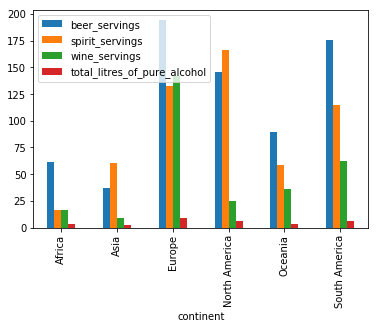

In [223]:
data.plot(kind='bar')

## Data Series

In [225]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [226]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [229]:
movies.genre.count()

979

In [233]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [234]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

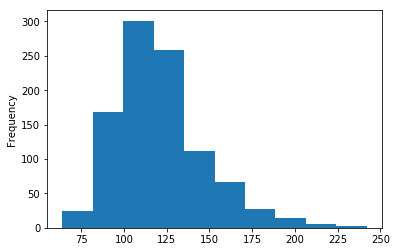

In [235]:
movies.duration.plot(kind='hist')

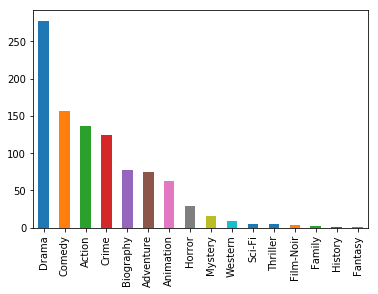

In [244]:
movies.genre.value_counts().plot(kind='bar')

## Handling missing values

In [245]:
url = "http://bit.ly/uforeports"
report = pd.read_csv(url)
report.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [246]:
report.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [248]:
report['City'].count()

18216

In [249]:
report.isnull()

,City,Colors Reported,Shape Reported,State,Time
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False
5,False,True,False,False,False
6,False,True,False,False,False
7,False,True,False,False,False
8,False,True,False,False,False
9,False,True,False,False,False


In [250]:
report.notnull()

,City,Colors Reported,Shape Reported,State,Time
0,True,False,True,True,True
1,True,False,True,True,True
2,True,False,True,True,True
3,True,False,True,True,True
4,True,False,True,True,True
5,True,False,True,True,True
6,True,False,True,True,True
7,True,False,True,True,True
8,True,False,True,True,True
9,True,False,True,True,True


In [254]:
report.isnull().sum() #how many null values in each column

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [255]:
report[report.City.isnull()] #shows thne 25 cities whose value is NULL ie NaN

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


## drop missing values

In [262]:
report.shape

(18241, 5)

In [263]:
#drop rows if any of the columns have a missing value
# how='any' is the default, you need not include this
report.dropna(how='any').shape

(2486, 5)

In [264]:
report.dropna().shape

(2486, 5)

In [265]:
# drop row if all of the columns are missing
report.dropna(how='all').shape

(18241, 5)

In [273]:
# drop row if either City or Shape Reported are missing
report.dropna(subset=['City', 'Shape Reported']).shape

(15576, 5)

In [275]:
# drop row if both City and Shape Reported are missing
report.dropna(subset=['City','Shape Reported'], how='all').shape

(18237, 5)

## Filling missing values

In [276]:
# this shows missing values (NaN)
report['Shape Reported'].value_counts(dropna=False)

LIGHT        2803
NaN          2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
DOME            1
PYRAMID         1
FLARE           1
HEXAGON         1
Name: Shape Reported, dtype: int64